In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
def solve(f, h, dt, u0, l1, l2, k, steps, bc=(lambda mat: mat)):
    if type(u0) == int:
        u0 = np.zeros(f.shape)
    u = np.copy(u0)
    
    fij = f[1:-1,1:-1]
    sol = []
    sol.append(np.copy(u))

    for i in range(steps):
        uipj,uimj,uijp,uijm,uij = u[1:-1,2:],u[1:-1,:-2],u[2:,1:-1],u[:-2,1:-1],u[1:-1,1:-1]
        u_kp = uij+dt/2*(fij-l1*(uipj-uimj)/(2*h)-l2*(uijp-uijm)/(2*h)-l1*l1*dt/2*(uipj-2*uij+uimj)/(h*h)-l2*l2*dt/2*(uijp-2*uij+uijm)/(h*h) )
        u[1:-1,1:-1],u,p,uijp,uijm,uij = u_kp,bc(u),k*dt/4/(h*h),u[2:,1:-1],u[:-2,1:-1],u[1:-1,1:-1]
        D = uij+p*(uijp-2*uij+uijm)
        ui = []
        ab = np.ones((3, uij.shape[0]))*np.array([[-p],[1+2*p],[-p]])
        for d in D:
            ui.append(linalg.solve_banded((1,1), ab, d))
        u[1:-1,1:-1] = np.array(ui)
        u = bc(u)
        uipj,uimj,uij = u[1:-1,2:],u[1:-1,:-2],u[1:-1,1:-1]
        D = uij+p*(uipj-2*uij+uimj)
        uj = []
        ab = np.ones((3, uij.shape[0]))*np.array([[-p],[1+2*p],[-p]])
        for d in D:
            uj.append(linalg.solve_banded((1,1), ab, d))
        u[1:-1,1:-1] = np.array(uj).T
        u = bc(u)
        sol.append(np.copy(u))
    
    return np.array(sol)

In [3]:
x_min,x_max,y_min,y_max,h = -1.,1.,-1.,1.,0.02
nx,ny = int((x_max - x_min)/h),int((y_max - y_min) / h)
x,y = np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny)
xg, yg = np.meshgrid(x,y)
f = 1-(xg*xg+yg*yg)
sol = solve(f, h, 0.001, 0, l1=15, l2=10, k=2, steps=1000)

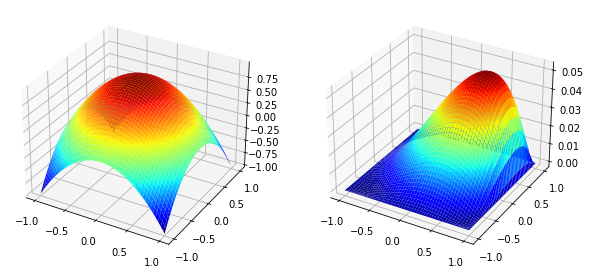

In [4]:
fig = plt.figure(figsize=(10, 8))
axes_1 = fig.add_subplot(1, 2, 1, projection='3d')
axes_2 = fig.add_subplot(1, 2, 2, projection='3d')
axes_1.plot_surface(xg, yg, f, cmap='jet')
axes_2.plot_surface(xg, yg, sol[1000,:,:], cmap='jet')

plt.show()